# 1 Introduction

#Company Introduction

1.   Their avocados are sourced from over 1000 growers owning over 65,000 acres across California, Mexico, Chile, and Peru.
2.   With generations of experience growing, packing, and shipping avocados, they have a deep understanding of the avocado industry.
3. Their aim is to source quality fruit that’s sustainably grown and handled in the most efficient, shortest supply route possible.
4. They want to increase their supply throughout the United States and need to make sure that they are selling their products at the best possible price.

#Current Scenario

1.   Avocado prices have rocketed in recent years by up to 129%, with the average national price in the US of a single Hass avocado reaching $2.10 in 2019, almost doubling in just one year.
2.   Due to this uncertainty in the prices, the company is not able to sell their produce at the optimal price.



1. Determine what is the problem: In this case we want to have accurate forecast of Avocado prices.
2. Gathering Information: Understand what was the process that was used to gather the information and if the information is sufficient to have effective predictive models.
3. Implementing Exploratory Analysis: Determine if there are any sort of patterns in our data before going into building the models.
4. Choosing predictive models: This is the phase where we decide which model is the most appropriate to make our forecasting most effective.
5. Testing our model: Analyze if our model is effective enough to make effective predictions.

In [ ]:
!unzip /content/Avocado-Price-Prediction.zip

Archive:  /content/Avocado-Price-Prediction.zip
replace avocado_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#2 Problem Statement

The current process suffers from the following problems:

The price of avocado is dependent on global demands and seasonal production. Due to these reasons, it is quite difficult to know for certain the price in the future



#3  Installing & Importing Libraries

In [ ]:
# Import all necessary librararies & packages
import numpy as np
import pandas as pd

#import pandas_profiling
#from pandas_profiling import ProfileReport 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.options.mode.chained_assignment = None




#4. Data Acquisition & Description

In [ ]:
APD_Train_df = pd.read_csv("/content/avocado_train.csv") # Import Train Data in DF
APD_Test_df = pd.read_csv("/content/avocado_test.csv") # Import Test Data in DF

In [ ]:
APD_Train_df.head()

,Id,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,14761,2017-08-20,1.86,2584.08,61.21,143.82,0.00,2379.05,2379.05,0.00,0.0,organic,2017,Albany
1,6843,2017-11-12,1.14,100811.00,3181.00,43510.00,86.00,54034.00,11788.00,42246.00,0.0,conventional,2017,Louisville
2,7306,2017-02-12,0.95,430096.94,242212.80,81697.52,264.25,105922.37,48557.37,57365.00,0.0,conventional,2017,Orlando
3,12329,2016-05-22,1.71,5433.16,437.48,2422.71,544.63,2028.34,2021.67,6.67,0.0,organic,2016,Charlotte
4,12036,2016-01-10,1.66,5614.09,2123.47,2121.26,0.00,1369.36,392.02,977.34,0.0,organic,2016,Atlanta


In [ ]:
APD_Test_df.head()

,Id,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,11137,2015-05-03,12425.42,426.78,6174.20,548.21,5276.23,2313.33,2962.90,0.00,organic,2015,RichmondNorfolk
1,16503,2017-10-08,11837.20,2749.91,124.43,0.00,8962.86,8921.88,40.98,0.00,organic,2017,PhoenixTucson
2,6438,2017-07-02,4250394.01,740503.01,1423924.97,356791.68,1729174.35,1157601.31,485376.01,86197.03,conventional,2017,GreatLakes
3,8247,2017-05-14,74951.66,1032.62,43170.45,42.00,30706.59,28525.65,2180.94,0.00,conventional,2017,Syracuse
4,10481,2015-12-13,4594.71,592.64,2602.48,0.00,1399.59,696.67,702.92,0.00,organic,2015,Nashville


In [ ]:
APD_Train_df.describe()

,Id,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,14599.000000,14599.000000,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,14599.000000,14599.000000
mean,9116.120899,1.409168,8.136614e+05,2.787616e+05,2.835157e+05,2.175564e+04,2.296264e+05,1.746354e+05,5.199545e+04,2995.622236,2016.146174
std,5279.989902,0.404518,3.292013e+06,1.206792e+06,1.150215e+06,1.025608e+05,9.429775e+05,7.139212e+05,2.343441e+05,17313.445157,0.937565
min,2.000000,0.440000,3.855500e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,4538.500000,1.100000,1.080823e+04,8.493600e+02,3.018255e+03,0.000000e+00,5.040900e+03,2.828890e+03,1.314550e+02,0.000000,2015.000000
50%,9125.000000,1.370000,1.070186e+05,8.425390e+03,2.890747e+04,1.807200e+02,3.960296e+04,2.631176e+04,2.621750e+03,0.000000,2016.000000
75%,13698.500000,1.670000,4.261702e+05,1.087822e+05,1.451605e+05,6.136665e+03,1.096453e+05,8.300046e+04,2.151112e+04,127.940000,2017.000000
max,18249.000000,3.250000,6.250565e+07,2.162018e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
APD_Test_df.describe()

,Id,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,3650.000000,3.650000e+03,3.650000e+03,3.650000e+03,3.650000e+03,3.650000e+03,3.650000e+03,3.650000e+03,3650.000000,3650.000000
mean,9160.513973,9.985644e+05,3.499917e+05,3.417070e+05,2.717581e+04,2.796875e+05,2.124299e+05,6.370799e+04,3549.613236,2016.154795
std,5221.228262,4.032615e+06,1.473789e+06,1.398324e+06,1.250919e+05,1.142301e+06,8.626779e+05,2.789935e+05,19131.611332,0.949469
min,1.000000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,4680.250000,1.102260e+04,8.848725e+02,2.938222e+03,0.000000e+00,5.284002e+03,2.942858e+03,1.088600e+02,0.000000,2015.000000
50%,9131.000000,1.100332e+05,9.726290e+03,2.960670e+04,2.063600e+02,4.000460e+04,2.666419e+04,2.831680e+03,0.000000,2016.000000
75%,13653.750000,4.628083e+05,1.204247e+05,1.654237e+05,6.666458e+03,1.193041e+05,8.490868e+04,2.463901e+04,147.990000,2017.000000
max,18248.000000,6.103446e+07,2.274362e+07,2.032816e+07,1.800066e+06,1.629830e+07,1.256716e+07,3.789723e+06,377661.060000,2018.000000




To predict the future price of avocados depending on some variables / features we have such as

1. Date - The date of the observation
2. AveragePrice - the average price of a single avocado
3. Total Volume - Total number of avocados sold (small Hass + Large Hass + XLarge Hass + Total Bags)
4. 4046 - Total number of avocados with PLU 4046 sold
5. 4225 - Total number of avocados with PLU 4225 sold
6. 4770 - Total number of avocados with PLU 4770 sold
7. Total Bags = Small Bags + Large Bags + XLarge Bags
8. type - conventional or organic
9. year - the year
10. region - the city or region of the observation




#5. Data Pre-Processing

In [ ]:
APD_Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14599 entries, 0 to 14598
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            14599 non-null  int64  
 1   Date          14599 non-null  object 
 2   AveragePrice  14599 non-null  float64
 3   Total Volume  14599 non-null  float64
 4   4046          14599 non-null  float64
 5   4225          14599 non-null  float64
 6   4770          14599 non-null  float64
 7   Total Bags    14599 non-null  float64
 8   Small Bags    14599 non-null  float64
 9   Large Bags    14599 non-null  float64
 10  XLarge Bags   14599 non-null  float64
 11  type          14599 non-null  object 
 12  year          14599 non-null  int64  
 13  region        14599 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.6+ MB


In [ ]:
APD_Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            3650 non-null   int64  
 1   Date          3650 non-null   object 
 2   Total Volume  3650 non-null   float64
 3   4046          3650 non-null   float64
 4   4225          3650 non-null   float64
 5   4770          3650 non-null   float64
 6   Total Bags    3650 non-null   float64
 7   Small Bags    3650 non-null   float64
 8   Large Bags    3650 non-null   float64
 9   XLarge Bags   3650 non-null   float64
 10  type          3650 non-null   object 
 11  year          3650 non-null   int64  
 12  region        3650 non-null   object 
dtypes: float64(8), int64(2), object(3)
memory usage: 370.8+ KB


In [ ]:
APD_Train_df.isnull().sum().sum() # Total Missing Value in Train  DF

0

In [ ]:
#APD_Train_df.isnull().sum()# Column wise mossing values

In [ ]:
APD_Test_df.isnull().sum().sum()# Total Missing Value in Test DF

0

In [ ]:
APD_Train_df.duplicated().sum()# Total Duplicate Value in Train DF

0

In [ ]:
APD_Test_df.duplicated().sum()# Total Duplicate Value in Test DF

0

In [ ]:
# Drop Id column from Df
APD_Train_df.drop('Id',inplace=True,axis=1)
APD_Test_df.drop('Id',inplace=True,axis=1)

In [ ]:
APD_Train_df.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2017-08-20,1.86,2584.08,61.21,143.82,0.00,2379.05,2379.05,0.00,0.0,organic,2017,Albany
1,2017-11-12,1.14,100811.00,3181.00,43510.00,86.00,54034.00,11788.00,42246.00,0.0,conventional,2017,Louisville
2,2017-02-12,0.95,430096.94,242212.80,81697.52,264.25,105922.37,48557.37,57365.00,0.0,conventional,2017,Orlando
3,2016-05-22,1.71,5433.16,437.48,2422.71,544.63,2028.34,2021.67,6.67,0.0,organic,2016,Charlotte
4,2016-01-10,1.66,5614.09,2123.47,2121.26,0.00,1369.36,392.02,977.34,0.0,organic,2016,Atlanta


In [ ]:
APD_Test_df.head(5)

,Id,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,11137,2015-05-03,12425.42,426.78,6174.20,548.21,5276.23,2313.33,2962.90,0.00,organic,2015,RichmondNorfolk
1,16503,2017-10-08,11837.20,2749.91,124.43,0.00,8962.86,8921.88,40.98,0.00,organic,2017,PhoenixTucson
2,6438,2017-07-02,4250394.01,740503.01,1423924.97,356791.68,1729174.35,1157601.31,485376.01,86197.03,conventional,2017,GreatLakes
3,8247,2017-05-14,74951.66,1032.62,43170.45,42.00,30706.59,28525.65,2180.94,0.00,conventional,2017,Syracuse
4,10481,2015-12-13,4594.71,592.64,2602.48,0.00,1399.59,696.67,702.92,0.00,organic,2015,Nashville


In [ ]:
#Split Date Object to Date/ Month/ Year of Train Data
APD_Train_df['Date']=pd.to_datetime(APD_Train_df['Date'])
APD_Train_df['Month']=APD_Train_df['Date'].apply(lambda x:x.month)
APD_Train_df['Day']=APD_Train_df['Date'].apply(lambda x:x.day)

In [ ]:
APD_Train_df.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2017-08-20,1.86,2584.08,61.21,143.82,0.00,2379.05,2379.05,0.00,0.0,organic,2017,Albany,8,20
1,2017-11-12,1.14,100811.00,3181.00,43510.00,86.00,54034.00,11788.00,42246.00,0.0,conventional,2017,Louisville,11,12
2,2017-02-12,0.95,430096.94,242212.80,81697.52,264.25,105922.37,48557.37,57365.00,0.0,conventional,2017,Orlando,2,12
3,2016-05-22,1.71,5433.16,437.48,2422.71,544.63,2028.34,2021.67,6.67,0.0,organic,2016,Charlotte,5,22
4,2016-01-10,1.66,5614.09,2123.47,2121.26,0.00,1369.36,392.02,977.34,0.0,organic,2016,Atlanta,1,10


In [ ]:
#Split Date Object to Date/ Month/ Year of Test Data
APD_Test_df['Date']=pd.to_datetime(APD_Test_df['Date'])
APD_Test_df['Month']=APD_Test_df['Date'].apply(lambda x:x.month)
APD_Test_df['Day']=APD_Test_df['Date'].apply(lambda x:x.day)

In [ ]:
APD_Test_df.head(5)

,Id,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,11137,2015-05-03,12425.42,426.78,6174.20,548.21,5276.23,2313.33,2962.90,0.00,organic,2015,RichmondNorfolk,5,3
1,16503,2017-10-08,11837.20,2749.91,124.43,0.00,8962.86,8921.88,40.98,0.00,organic,2017,PhoenixTucson,10,8
2,6438,2017-07-02,4250394.01,740503.01,1423924.97,356791.68,1729174.35,1157601.31,485376.01,86197.03,conventional,2017,GreatLakes,7,2
3,8247,2017-05-14,74951.66,1032.62,43170.45,42.00,30706.59,28525.65,2180.94,0.00,conventional,2017,Syracuse,5,14
4,10481,2015-12-13,4594.71,592.64,2602.48,0.00,1399.59,696.67,702.92,0.00,organic,2015,Nashville,12,13


In [ ]:
APD_Train_df['type'].nunique()

2

In [ ]:
APD_Train_df.groupby('type').size()

type
conventional    7301
organic         7298
dtype: int64

In [ ]:
APD_Train_df['region'].nunique()

54

In [ ]:
# APD_Train_df.groupby('region').size()

In [ ]:
APD_Train_df.skew()

AveragePrice     0.581313
Total Volume     9.279850
4046             8.854903
4225             9.213700
4770            10.603288
Total Bags      10.126847
Small Bags       9.867414
Large Bags      10.235405
XLarge Bags     13.809064
year             0.213583
Month            0.093870
Day              0.010784
dtype: float64


#6. EDA & Class Imbalance Check

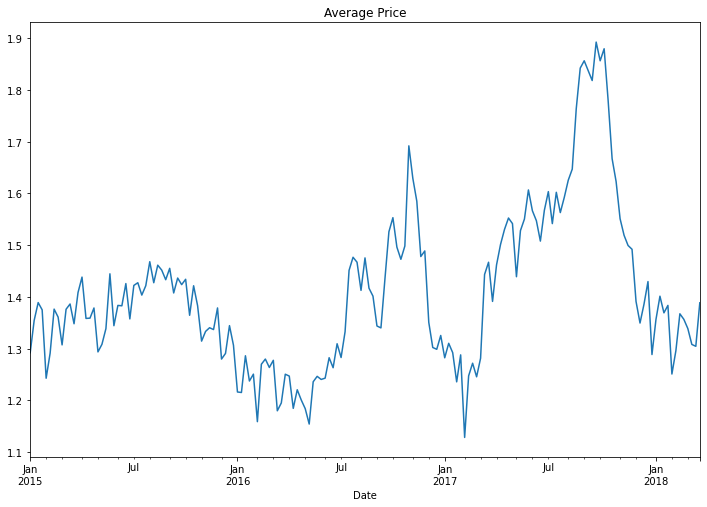

In [ ]:
# Avocado's Average Price through the Date
byDate=APD_Train_df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')
plt.show()

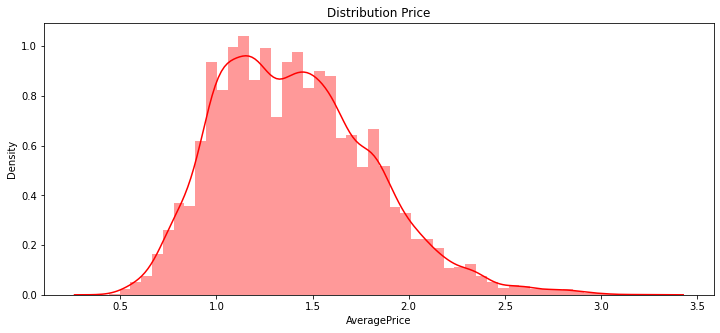

In [ ]:
#Average Price by Region
plt.figure(figsize=(12,5))
plt.title("Distribution Price")
ax = sns.distplot(APD_Train_df["AveragePrice"], color = 'R')

In [ ]:
APD_Train_df.corr()
# sns.pairplot(APD_Train_df)
# plt.show()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.194316,-0.210214,-0.173584,-0.178898,-0.178161,-0.175261,-0.174219,-0.118503,0.099698,0.163394,0.027757
Total Volume,-0.194316,1.000000,0.975787,0.972964,0.865017,0.961430,0.965507,0.872056,0.747936,0.016044,-0.025326,-0.008746
4046,-0.210214,0.975787,1.000000,0.920712,0.824506,0.914055,0.919157,0.826518,0.695311,0.002110,-0.026986,-0.008999
4225,-0.173584,0.972964,0.920712,1.000000,0.879280,0.902999,0.913477,0.799675,0.690658,-0.011195,-0.023799,-0.011486
4770,-0.178898,0.865017,0.824506,0.879280,1.000000,0.783390,0.793953,0.682296,0.693546,-0.037146,-0.035180,-0.004899
Total Bags,-0.178161,0.961430,0.914055,0.902999,0.783390,1.000000,0.993775,0.937043,0.803396,0.071005,-0.021024,-0.004474
Small Bags,-0.175261,0.965507,0.919157,0.913477,0.793953,0.993775,1.000000,0.892609,0.809134,0.063230,-0.021466,-0.003096
Large Bags,-0.174219,0.872056,0.826518,0.799675,0.682296,0.937043,0.892609,1.000000,0.693906,0.087499,-0.018259,-0.008678
XLarge Bags,-0.118503,0.747936,0.695311,0.690658,0.693546,0.803396,0.809134,0.693906,1.000000,0.075655,-0.012776,0.001458
year,0.099698,0.016044,0.002110,-0.011195,-0.037146,0.071005,0.063230,0.087499,0.075655,1.000000,-0.173254,0.001157


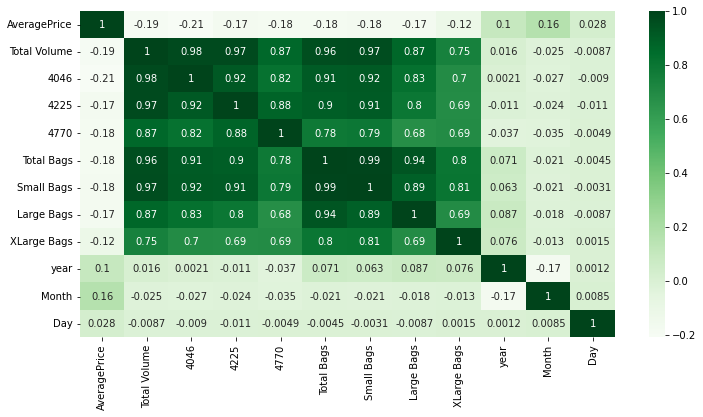

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(APD_Train_df.corr(),cmap='Greens',annot=True)
plt.show()

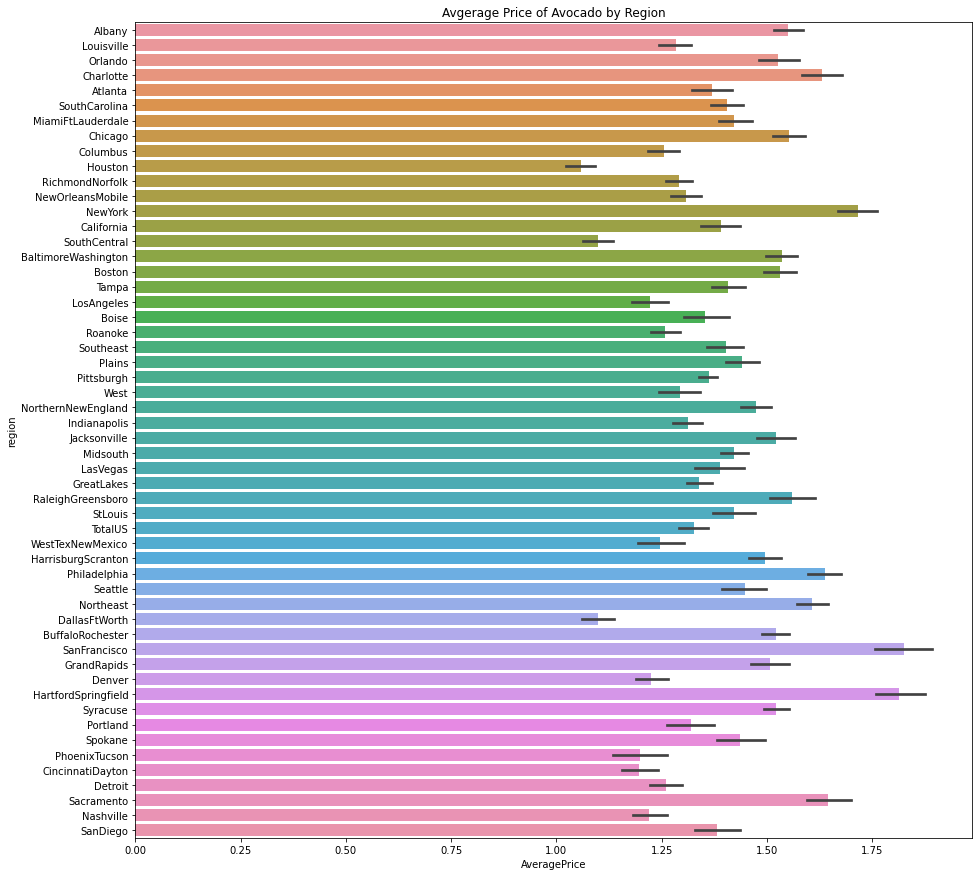

In [ ]:
plt.figure(figsize=(15,15))
plt.title("Avgerage Price of Avocado by Region")
sns.barplot(x="AveragePrice",y="region",data=APD_Train_df)
plt.show()

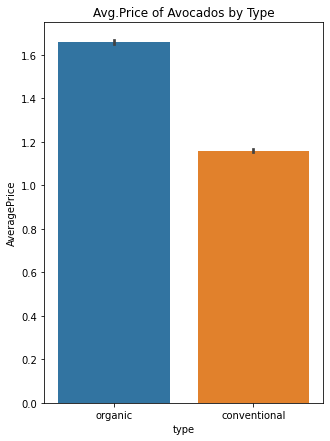

In [ ]:
plt.figure(figsize=(5,7))
plt.title("Avg.Price of Avocados by Type")
sns.barplot(x="type",y="AveragePrice",data= APD_Train_df)
plt.show()

# Feature Engineering

In [ ]:
# Drop Date Column from Train & Test DF
APD_Train_df.drop(['Date'], axis=1,inplace=True)
APD_Test_df.drop(['Date'], axis=1,inplace=True)

In [ ]:
APD_Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14599 entries, 0 to 14598
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  14599 non-null  float64
 1   Total Volume  14599 non-null  float64
 2   4046          14599 non-null  float64
 3   4225          14599 non-null  float64
 4   4770          14599 non-null  float64
 5   Total Bags    14599 non-null  float64
 6   Small Bags    14599 non-null  float64
 7   Large Bags    14599 non-null  float64
 8   XLarge Bags   14599 non-null  float64
 9   type          14599 non-null  object 
 10  year          14599 non-null  int64  
 11  region        14599 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.3+ MB


#7. Model & Result

In [ ]:

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# from sklearn.feature_selection import SelectFromModel, SelectPercentile
# from sklearn.metrics import f1_score, confusion_matrix

# from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
# from sklearn.svm import LinearSVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.naive_bayes import GaussianNB

In [ ]:
#Train Test Split for Train Data
X = APD_Train_df.drop(['AveragePrice'], axis=1)
Y = APD_Train_df['AveragePrice']


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((11679, 11), (11679,), (2920, 11), (2920,))

In [ ]:
#Train  Cont and Cat split
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cont = X_train.select_dtypes(exclude=['object'])

# Test Cont and Cat split
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cont = X_test.select_dtypes(exclude=['object'])

# Perform on Test_data
APD_Test_df_cat = APD_Test_df.select_dtypes(include=['object'])
APD_Test_df_cont =APD_Test_df.select_dtypes(exclude=['object'])

In [ ]:
APD_Test_df_cont.columns

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'year'],
      dtype='object')

In [ ]:
# Encoding for Train data set
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler, MinMaxScaler
enc = OneHotEncoder(drop='first', sparse = False)
enc.fit(X_train_cat)
enc.categories_

[array(['conventional', 'organic'], dtype=object),
 array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
        'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
        'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
        'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
        'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
        'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
        'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
        'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
        'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
        'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
        'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
        'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
        'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)]

In [ ]:
# Encoding for Test data set 
enc1 = OneHotEncoder(drop='first', sparse = False)
enc1.fit(APD_Test_df_cat) # Performed on test_data
enc1.categories_

[array(['conventional', 'organic'], dtype=object),
 array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
        'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
        'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
        'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
        'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
        'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
        'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
        'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
        'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
        'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
        'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
        'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
        'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)]

In [ ]:
# Transformation For Train data ( Split to Train & Test)
X_train_OHE = pd.DataFrame(enc.transform(X_train_cat), columns = enc.get_feature_names_out(X_train_cat.columns), index = X_train_cat.index)
X_test_OHE = pd.DataFrame(enc.transform(X_test_cat), columns = enc.get_feature_names_out(X_test_cat.columns), index = X_test_cat.index)

In [ ]:
# Transformation For Test Dataset
APD_Test_df_OHE = pd.DataFrame(enc.transform(APD_Test_df_cat), columns = enc.get_feature_names_out(APD_Test_df_cat.columns), index =APD_Test_df_cat.index)

In [ ]:
APD_Test_df_OHE.shape

(3650, 54)

In [ ]:
# Scaling of Train Data Set

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_cont)

StandardScaler()

In [ ]:
# Object created for Test Data Set
scaler1 = StandardScaler()

In [ ]:
#For Train dataset ( Which is split in Train & Test)
X_train_s = pd.DataFrame(scaler.transform(X_train_cont), columns = X_train_cont.columns, index = X_train_cont.index)
X_test_s = pd.DataFrame(scaler.transform(X_test_cont), columns = X_train_cont.columns, index = X_test_cont.index)

In [ ]:
#For Test dataset
scaler1.fit(APD_Test_df_cont) 
Hotel_Test_df_s = pd.DataFrame(scaler1.transform(APD_Test_df_cont), columns = APD_Test_df_cont.columns, index = APD_Test_df_cont.index)

##Concatenet

In [ ]:
# Train DataSet
X_train_comb = pd.concat([X_train_OHE,X_train_s], axis=1)
X_test_comb = pd.concat([X_test_OHE,X_test_s], axis=1)

In [ ]:
# Test DataSet
APD_Test_df_comb = pd.concat([APD_Test_df_OHE,Hotel_Test_df_s], axis=1)
APD_Test_df_comb.shape

(3650, 63)

In [ ]:
# Linear Regression on Train Data
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_comb,y_train)
pred=lr.predict(X_test_comb)

In [ ]:
# Linear Regression Model Evaluation
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.19689763069877161
MSE: 0.0691860140002207
RMSE: 0.26303234401917325


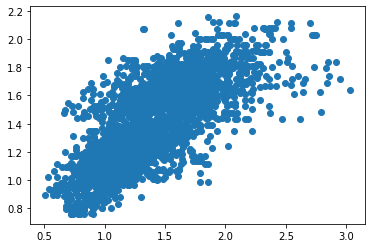

In [ ]:
plt.scatter(x=y_test,y=pred)
plt.show()

In [ ]:
#  Decision tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train_comb,y_train)
pred=dtr.predict(X_test_comb)

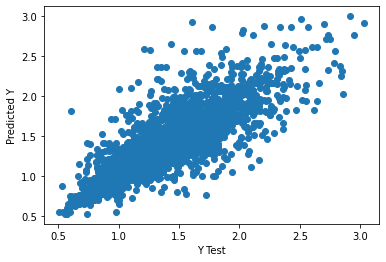

In [ ]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.1480821917808219
MSE: 0.051081232876712325
RMSE: 0.22601157686435516


In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor(n_estimators=200)
rdr.fit(X_train_comb,y_train)
pred=rdr.predict(X_test_comb)

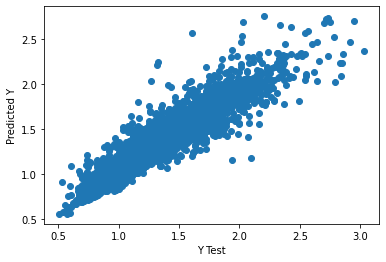

In [ ]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.10966616438356165
MSE: 0.024010914251712326
RMSE: 0.15495455544033654


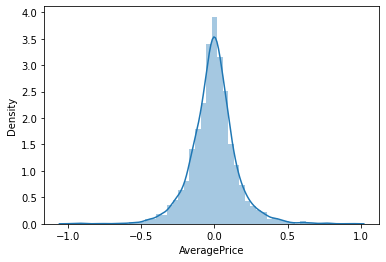

In [ ]:
sns.distplot((y_test-pred),bins=50)
plt.show()

,Y Test,Pred
8841,2.07,1.91545
4866,1.55,1.49810
10992,1.18,1.40595
5932,1.93,2.08410
14202,1.60,1.49820


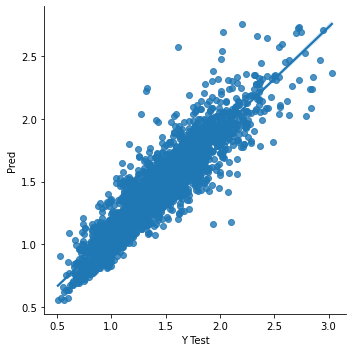

In [ ]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# Model Application

In [ ]:
# Perform Random Forest Regressor on Test Data
RF_pred = rdr.predict(APD_Test_df_comb)

In [ ]:
RF_pred

array([1.5285 , 1.5186 , 1.2691 , ..., 1.22145, 1.5042 , 1.2896 ])

In [ ]:
APD_Test_df =APD_Test_df.drop(APD_Test_df.iloc[:,1:],axis = 1)
APD_Test_df['	AveragePrice '] = RF_pred

In [ ]:
APD_Test_df.to_csv('Submission.csv', index = False, header=False )
Submission_df = pd.read_csv("/content/Submission.csv")

In [ ]:
Submission_df.head()

,12425.42,1.5285000000000009
0,11837.20,1.51860
1,4250394.01,1.26910
2,74951.66,1.44025
3,4594.71,1.68395
4,4022549.75,1.22380
